In [16]:
import requests
from bs4 import BeautifulSoup
import csv
from itertools import zip_longest
import pandas as pd

In [17]:
jobs = []
c_name = []
c_loc = []
links = []

In [18]:
# Cell 3: Scrape All Pages
page_num = 0
while True:
    url = requests.get(f'https://wuzzuf.net/search/jobs/?a=spbg&q=flutter%20developer&start={page_num}')
    html = url.content
    page = BeautifulSoup(html, 'lxml')

    job_titles = page.find_all('h2', {'class':'css-193uk2c'})
    company_names = page.find_all('a', {'class':'css-ipsyv7'})
    company_loc = page.find_all('span', {'class':'css-16x61xq'})

    if len(job_titles) == 0:
        break

    print(f"Page {page_num}: Found {len(job_titles)} jobs")

    for i in range(len(job_titles)):
        jobs.append(job_titles[i].text)
        c_name.append(company_names[i].text[:-2])
        c_loc.append(company_loc[i].text.strip())
        links.append(job_titles[i].find('a').attrs['href'])

    page_num += 1

print(f"\nTotal jobs scraped: {len(jobs)}")

Page 0: Found 15 jobs
Page 1: Found 15 jobs
Page 2: Found 5 jobs

Total jobs scraped: 35


In [19]:
data_list = [jobs, c_name, c_loc, links]
exported = zip_longest(*data_list)
df = pd.DataFrame(exported, columns=['Job Title', 'Company Name', 'Company Location', 'Link'])
df

,Job Title,Company Name,Company Location,Link
0,Flutter Developer,Winji,"New Cairo, Cairo, Egypt",https://wuzzuf.net/jobs/p/oskd4etkbtes-flutter...
1,Senior Flutter Developer,Furat - فرات,"Cairo, Egypt",https://wuzzuf.net/jobs/p/jmz7s4fgyul4-senior-...
2,Flutter Developer (Mobile Engineer),OYA,"6th of October, Giza, Egypt",https://wuzzuf.net/jobs/p/kmpjkuvofsug-flutter...
3,Flutter Developer,Trio Apps,"New Cairo, Cairo, Egypt",https://wuzzuf.net/jobs/p/nbelai9dvzb0-flutter...
4,Flutter Developer in Alexandria,rank,"Alexandria, Egypt",https://wuzzuf.net/jobs/p/bpmsx3d6d2uy-flutter...
5,Flutter Developer,Premium Card,"Dokki, Giza, Egypt",https://wuzzuf.net/jobs/p/ckgyhl5esap7-flutter...
6,Senior Flutter Developer,Smartly,"Nasr City, Cairo, Egypt",https://wuzzuf.net/jobs/p/qa2axut12hvu-senior-...
7,Senior Flutter Software Developer,Confidential,"6th of October, Giza, Egypt",https://wuzzuf.net/jobs/p/wni8mapnsfsd-senior-...
8,Sr. Flutter Developer,Ashtar Tech,"Maadi, Cairo, Egypt",https://wuzzuf.net/jobs/p/uwpk3tmifmgx-sr-flut...
9,Senior Flutter Mobile Application Developer,OrobaSoft,"Cairo, Egypt",https://wuzzuf.net/jobs/p/y5bi9rmcyujm-senior-...


In [20]:
df.to_csv('data_analyst_jobs.csv', index=False)
print("Data saved to 'data_analyst_jobs.csv'")

Data saved to 'data_analyst_jobs.csv'


Company Name
Confidential         5
BlackDuck            3
Furat - فرات         1
Trio Apps            1
OYA                  1
rank                 1
Premium Card         1
Smartly              1
Ashtar Tech          1
OrobaSoft            1
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Companies Hiring Flutter Developers'}, ylabel='Company Name'>

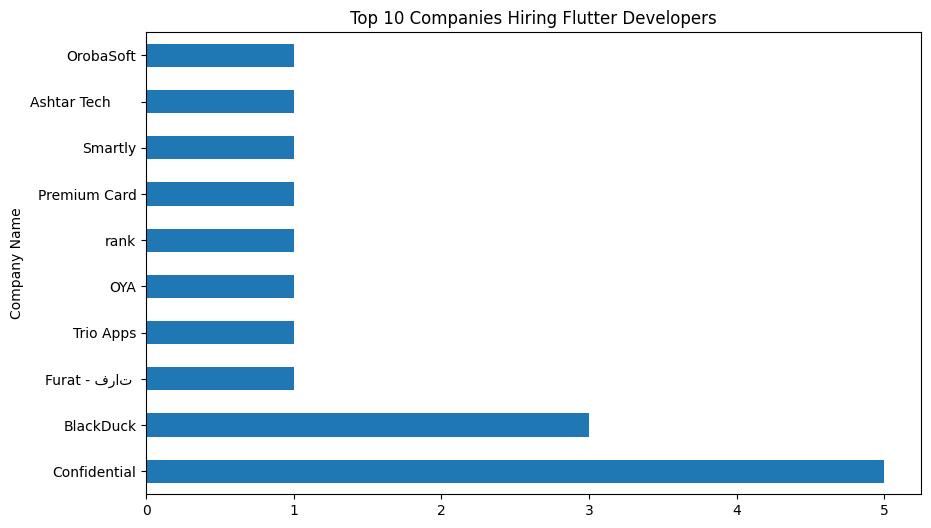

In [21]:
# Question 1 - Which companies are hiring the most Flutter Developers?
company_counts = df['Company Name'].value_counts()
print(company_counts.head(10))
company_counts.head(10).plot(kind='barh', figsize=(10, 6), title='Top 10 Companies Hiring Flutter Developers')

Question 2: What are the most common locations for Flutter Dev jobs?
Company Location
Cairo, Egypt                          9
New Cairo, Cairo, Egypt               7
Nasr City, Cairo, Egypt               6
6th of October, Giza, Egypt           2
Alexandria, Egypt                     1
Dokki, Giza, Egypt                    1
Maadi, Cairo, Egypt                   1
Sahel, Cairo, Egypt                   1
Riyadh, Saudi Arabia                  1
10th of Ramadan City, Cairo, Egypt    1
Obour City, Cairo, Egypt              1
Downtown, Cairo, Egypt                1
Manial, Cairo, Egypt                  1
Nozha, Cairo, Egypt                   1
Dubai, United Arab Emirates           1
Name: count, dtype: int64




<Axes: title={'center': 'Top Locations for Flutter Dev Jobs'}, xlabel='Company Location'>

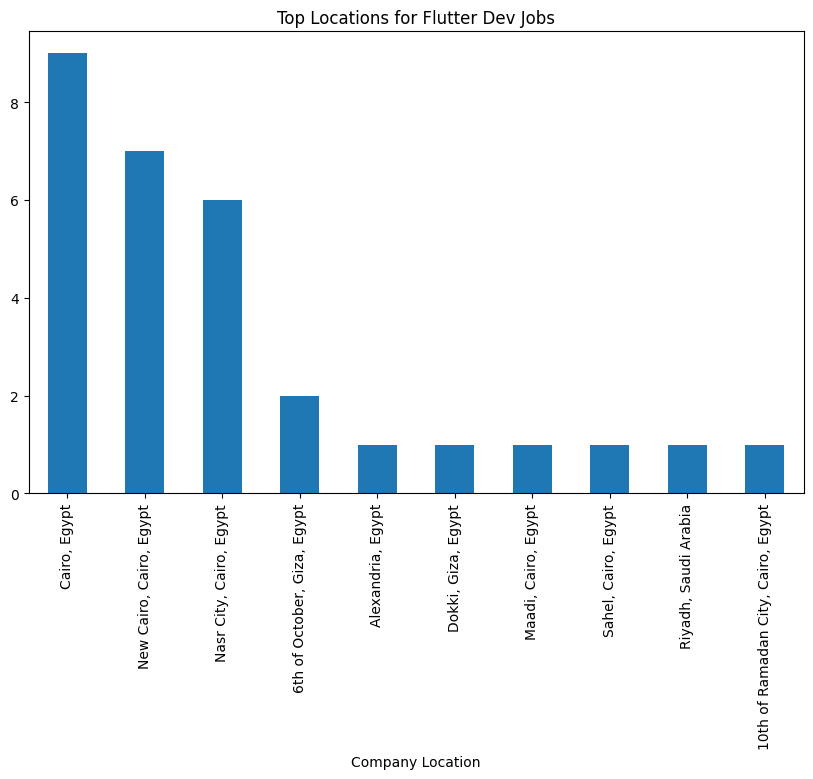

In [22]:
# Question 2 - What are the most common locations for Flutter Dev jobs?
print("Question 2: What are the most common locations for Flutter Dev jobs?")
print("=" * 70)
location_counts = df['Company Location'].value_counts()
print(location_counts)
print('\n')
location_counts.head(10).plot(kind='bar', figsize=(10, 6), title='Top Locations for Flutter Dev Jobs')

In [23]:
# Question 3 - What is the distribution of jobs across different cities?
print("Question 3: What is the distribution of jobs across different cities?")
print("=" * 70)
location_percentage = (df['Company Location'].value_counts() / len(df)) * 100
print(location_percentage)
print('\n')
print(f"Total unique locations: {df['Company Location'].nunique()}")

Question 3: What is the distribution of jobs across different cities?
Company Location
Cairo, Egypt                          25.714286
New Cairo, Cairo, Egypt               20.000000
Nasr City, Cairo, Egypt               17.142857
6th of October, Giza, Egypt            5.714286
Alexandria, Egypt                      2.857143
Dokki, Giza, Egypt                     2.857143
Maadi, Cairo, Egypt                    2.857143
Sahel, Cairo, Egypt                    2.857143
Riyadh, Saudi Arabia                   2.857143
10th of Ramadan City, Cairo, Egypt     2.857143
Obour City, Cairo, Egypt               2.857143
Downtown, Cairo, Egypt                 2.857143
Manial, Cairo, Egypt                   2.857143
Nozha, Cairo, Egypt                    2.857143
Dubai, United Arab Emirates            2.857143
Name: count, dtype: float64


Total unique locations: 15


In [24]:
# Question 4 - What are the most common keywords in Flutter Dev job titles?
all_titles = ' '.join(df['Job Title'].str.lower())
keywords = ['senior', 'junior', 'developer', 'flutter', 'mobile', 'android', 'ios', 'app']
keyword_counts = {}
for keyword in keywords:
    keyword_counts[keyword] = all_titles.count(keyword)
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])
print(keyword_df.sort_values('Count', ascending=False))

     Keyword  Count
2  developer     29
3    flutter     19
0     senior     11
4     mobile     10
7        app     10
1     junior      1
5    android      1
6        ios      1


In [25]:
# Question 5 - How many unique companies are offering Flutter Dev positions?
print("Question 5: How many unique companies are offering Flutter Dev positions?")
print("=" * 70)
unique_companies = df['Company Name'].nunique()
total_jobs = len(df)
avg_jobs_per_company = total_jobs / unique_companies

print(f"Total unique companies: {unique_companies}")
print(f"Total job postings: {total_jobs}")
print(f"Average jobs per company: {avg_jobs_per_company:.2f}")
print('\n')
print("Companies with multiple postings:")
multiple_postings = df['Company Name'].value_counts()
print(multiple_postings[multiple_postings > 1])

Question 5: How many unique companies are offering Flutter Dev positions?
Total unique companies: 29
Total job postings: 35
Average jobs per company: 1.21


Companies with multiple postings:
Company Name
Confidential    5
BlackDuck       3
Name: count, dtype: int64


In [26]:
# Cell 18: Summary Statistics
print("Summary Statistics")
print("=" * 70)
print(f"Total Flutter Dev jobs found: {len(df)}")
print(f"Unique companies: {df['Company Name'].nunique()}")
print(f"Unique locations: {df['Company Location'].nunique()}")
print(f"Most hiring company: {df['Company Name'].value_counts().index[0]} ({df['Company Name'].value_counts().iloc[0]} jobs)")
print(f"Most common location: {df['Company Location'].value_counts().index[0]} ({df['Company Location'].value_counts().iloc[0]} jobs)")

Summary Statistics
Total Flutter Dev jobs found: 35
Unique companies: 29
Unique locations: 15
Most hiring company: Confidential (5 jobs)
Most common location: Cairo, Egypt (9 jobs)
